In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

1. Carga de los datos

In [21]:
# Cargar los archivos CSV
gdp_df = pd.read_csv('/Users/noemipisu/Library/CloudStorage/OneDrive-AlmaMaterStudiorumUniversitàdiBologna/5943 - SERVICE MANAGEMENT/2° ANNO/CIENCIA DE DATOS EN TURISMO/PROYECTOS/TEMA 2/EJERCICIO 1/tec00114_page_linear.csv')
tourism_df = pd.read_csv('/Users/noemipisu/Library/CloudStorage/OneDrive-AlmaMaterStudiorumUniversitàdiBologna/5943 - SERVICE MANAGEMENT/2° ANNO/CIENCIA DE DATOS EN TURISMO/PROYECTOS/TEMA 2/EJERCICIO 1/tin00176_page_linear.csv')

In [37]:
# Eliminar valores nulos
gdp_df_clean.dropna(subset=['GDP_per_capita'], inplace=True)
tourism_df_clean.dropna(subset=['Tourist_nights'], inplace=True)

In [38]:
# Ver las primeras filas de los datos
gdp_df.head()
tourism_df.head()

,DATAFLOW,LAST UPDATE,freq,unit,nace_r2,c_resid,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
0,ESTAT:TIN00176(1.0),07/10/24 23:00:00,A,NR,I551-I553,EUR,AL,2018,1952848,e
1,ESTAT:TIN00176(1.0),07/10/24 23:00:00,A,NR,I551-I553,EUR,AL,2020,739579,e
2,ESTAT:TIN00176(1.0),07/10/24 23:00:00,A,NR,I551-I553,EUR,AL,2023,3522277,e
3,ESTAT:TIN00176(1.0),07/10/24 23:00:00,A,NR,I551-I553,EUR,AT,2012,103729543,NaN
4,ESTAT:TIN00176(1.0),07/10/24 23:00:00,A,NR,I551-I553,EUR,AT,2013,104495623,NaN


2. Limpieza y combinación de datos

In [23]:
# Selección y renombrado de columnas clave
gdp_df_clean = gdp_df[['geo', 'TIME_PERIOD', 'OBS_VALUE']].rename(columns={'OBS_VALUE': 'GDP_per_capita', 'TIME_PERIOD': 'Year'})
tourism_df_clean = tourism_df[['geo', 'TIME_PERIOD', 'OBS_VALUE']].rename(columns={'OBS_VALUE': 'Tourist_nights', 'TIME_PERIOD': 'Year'})

In [24]:
# Unir los dos DataFrames por país y año
combined_df = pd.merge(gdp_df_clean, tourism_df_clean, on=['geo', 'Year'])

In [39]:
# Eliminar valores nulos resultantes de la combinación
combined_df.dropna(inplace=True)

In [40]:
# Revisar el dataframe combinado
combined_df.head()

,geo,Year,GDP_per_capita,Tourist_nights
0,AL,2018,30,1952848
1,AL,2020,31,739579
2,AL,2023,35,3522277
3,AT,2012,133,103729543
4,AT,2013,133,104495623


3. Gráfico de dispersión y cálculo de la correlación global

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
print(combined_df.head())  # Para ver los primeros 5 registros
print(combined_df.describe())  # Para verificar la distribución de los datos

  geo  Year  GDP_per_capita  Tourist_nights
0  AL  2018              30         1952848
1  AL  2020              31          739579
2  AL  2023              35         3522277
3  AT  2012             133       103729543
4  AT  2013             133       104495623
              Year  GDP_per_capita  Tourist_nights
count   405.000000      405.000000    4.050000e+02
mean   2017.575309      100.153086    1.927749e+08
std       3.479414       44.541240    5.187956e+08
min    2012.000000       30.000000    7.395790e+05
25%    2015.000000       71.000000    9.337102e+06
50%    2018.000000       91.000000    2.906994e+07
75%    2021.000000      121.000000    9.482371e+07
max    2023.000000      283.000000    3.424042e+09


In [46]:
print(combined_df['GDP_per_capita'].min(), combined_df['GDP_per_capita'].max())
print(combined_df['Tourist_nights'].min(), combined_df['Tourist_nights'].max())

30 283
739579 3424041806


In [47]:
# Verificar si existen valores nulos
print(combined_df.isna().sum())

geo               0
Year              0
GDP_per_capita    0
Tourist_nights    0
dtype: int64


In [50]:
print(combined_df.shape)  # Debería mostrar el número de filas y columnas

(405, 4)


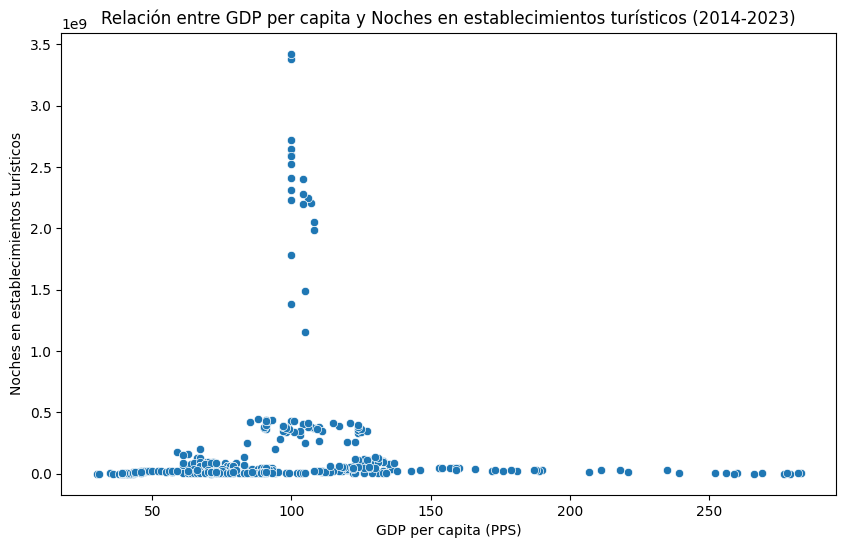

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración del gráfico
plt.figure(figsize=(10, 6))

# Graficar el dispersograma entre GDP per capita y noches turísticas
sns.scatterplot(data=combined_df, x='GDP_per_capita', y='Tourist_nights')

# Títulos y etiquetas
plt.title('Relación entre GDP per capita y Noches en establecimientos turísticos (2014-2023)')
plt.xlabel('GDP per capita (PPS)')
plt.ylabel('Noches en establecimientos turísticos')

# Mostrar el gráfico
plt.show()


4.  Filtrar por país y calcular la correlación

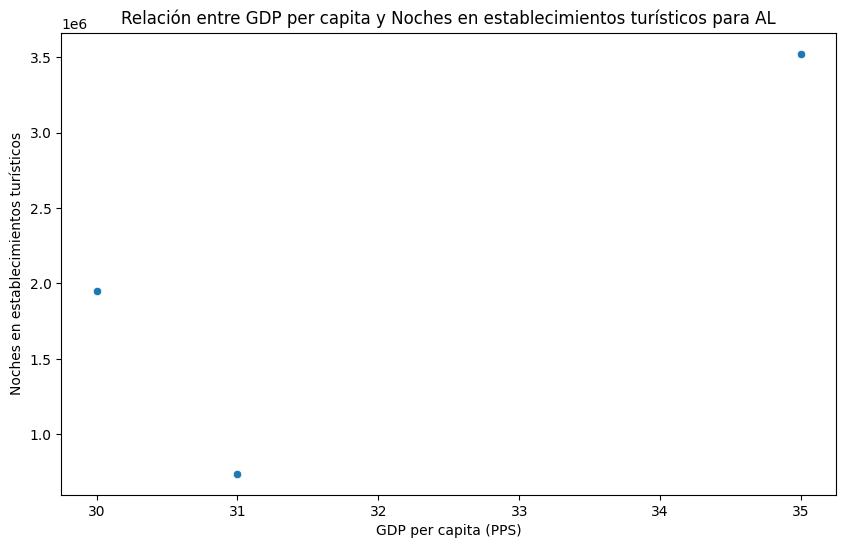

Correlación en AL: 0.8021179326870146


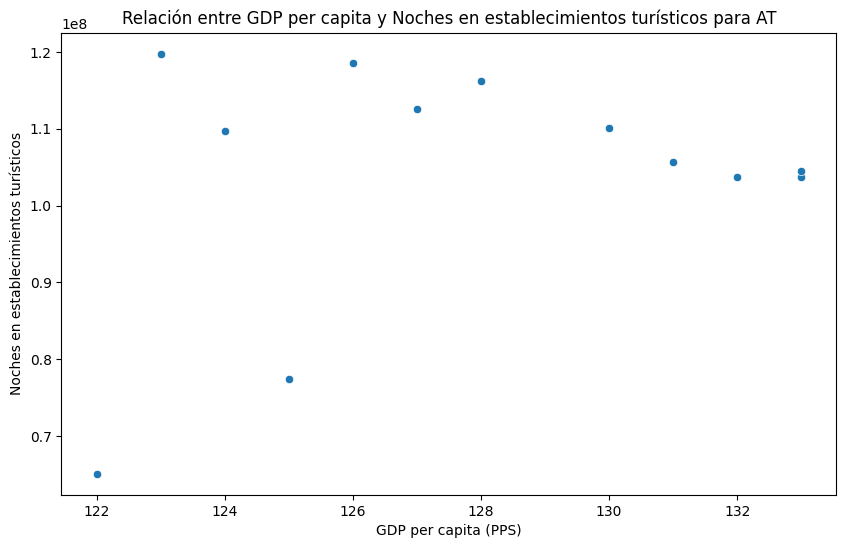

Correlación en AT: 0.2689427831266521


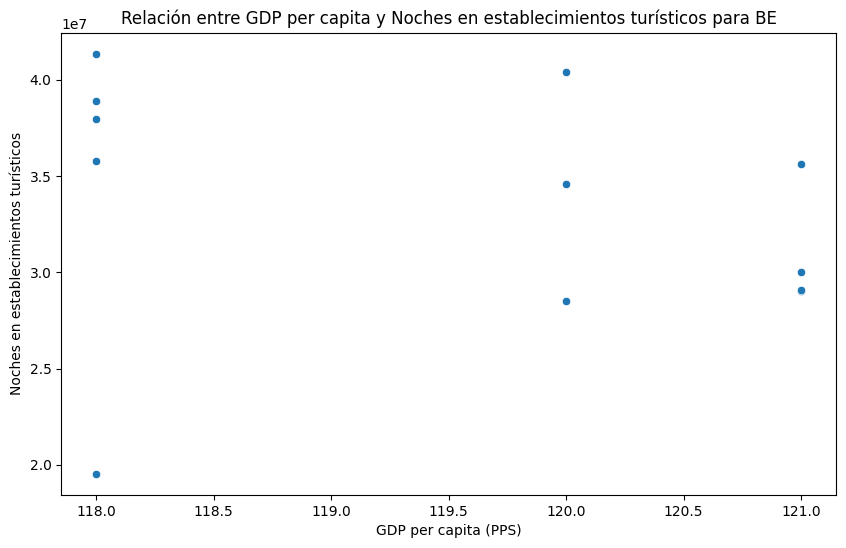

Correlación en BE: -0.23747795366573865


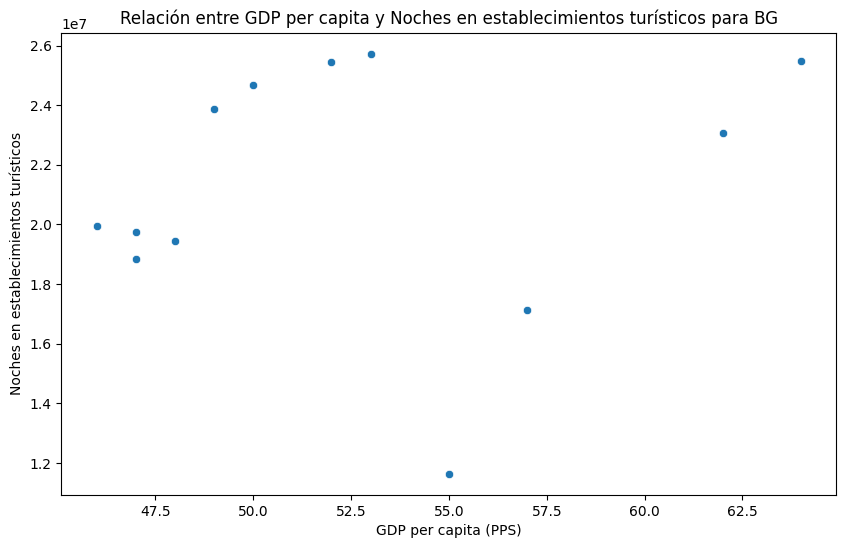

Correlación en BG: 0.15629463524729115


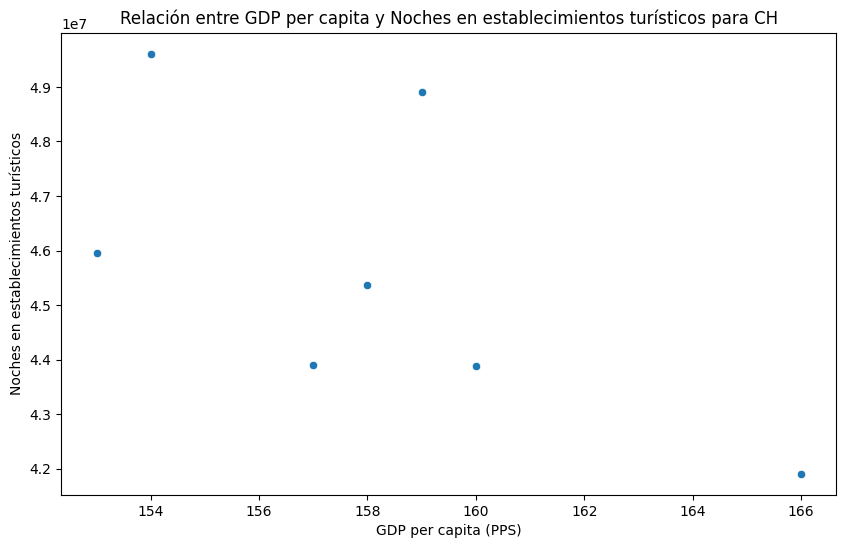

Correlación en CH: -0.6373526176465597


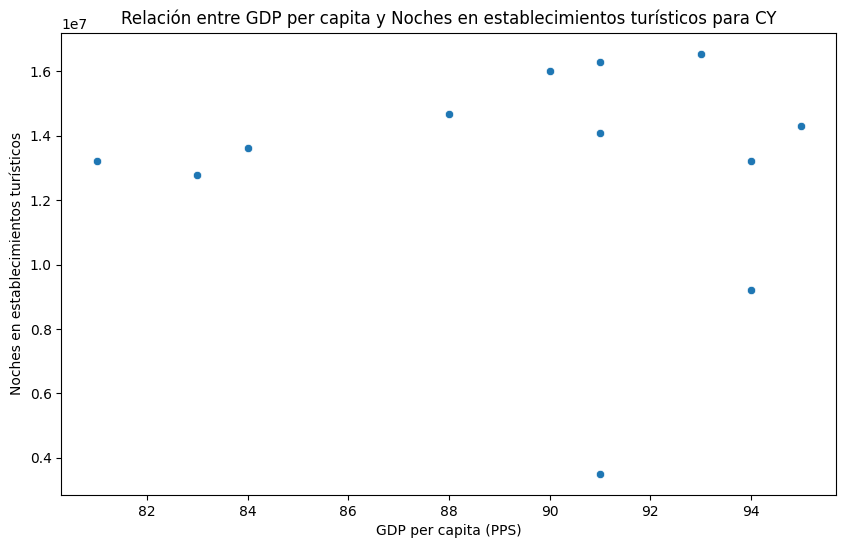

Correlación en CY: -0.04989590343996005


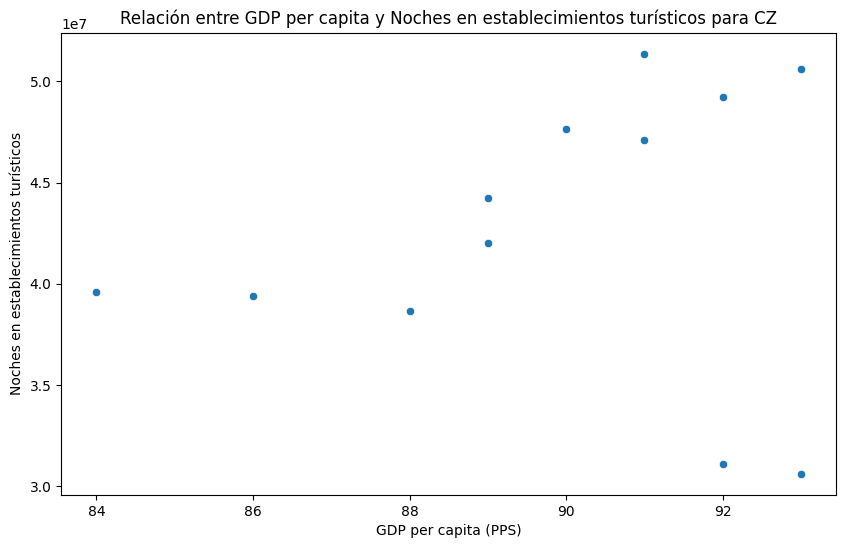

Correlación en CZ: 0.13516314859699946


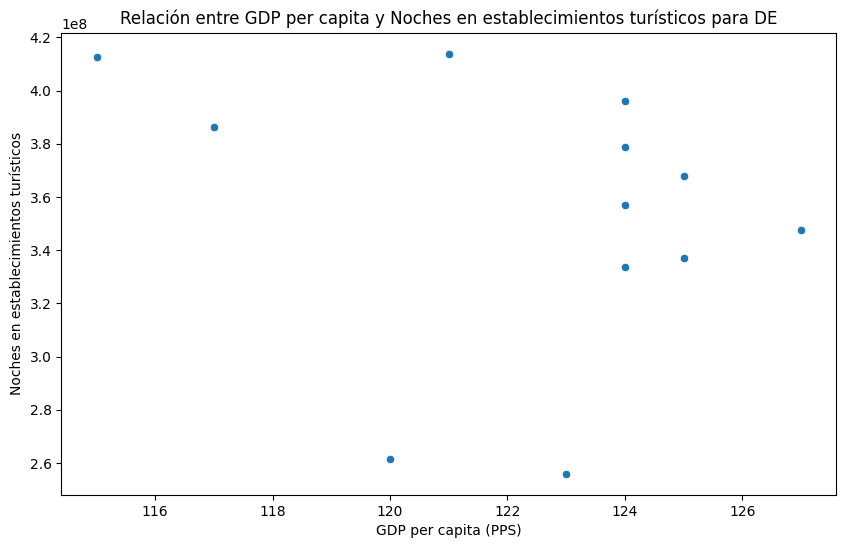

Correlación en DE: -0.2419245003237519


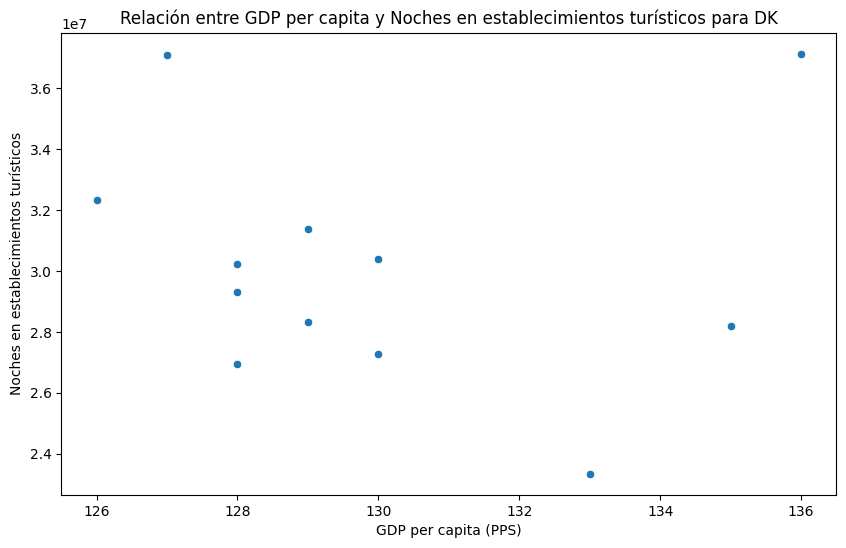

Correlación en DK: -0.06790846848020633


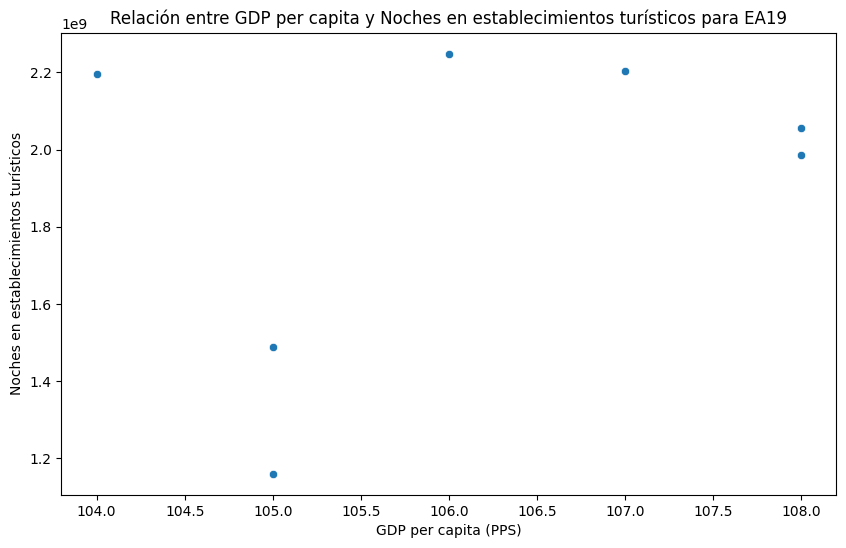

Correlación en EA19: 0.33926792077663553


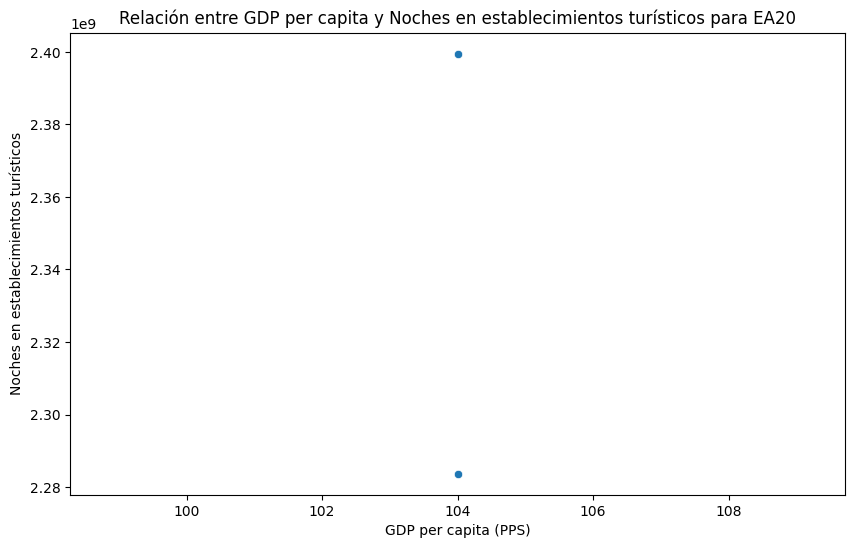

Correlación en EA20: nan


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


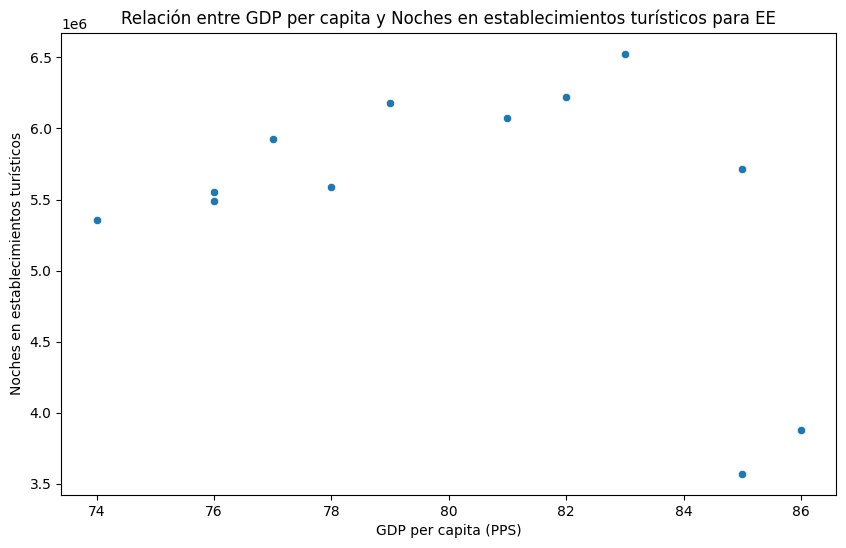

Correlación en EE: -0.3637015006277056


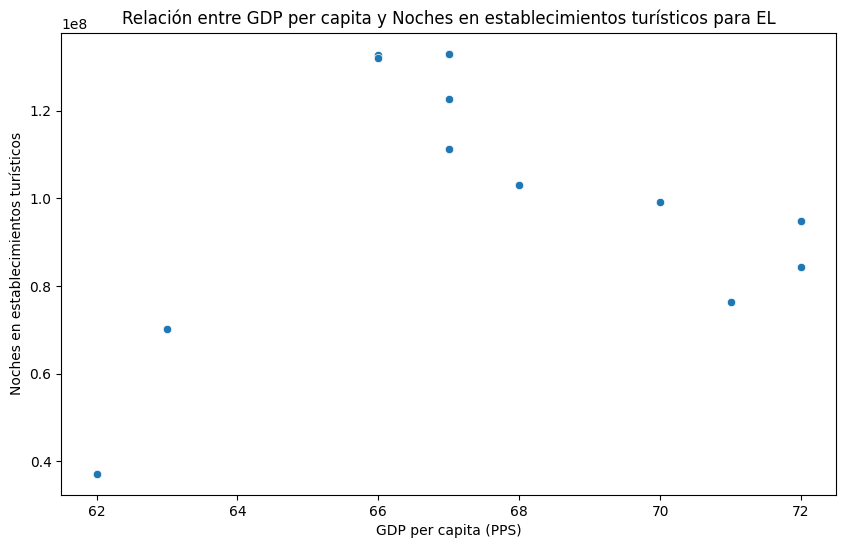

Correlación en EL: 0.16526428175848284


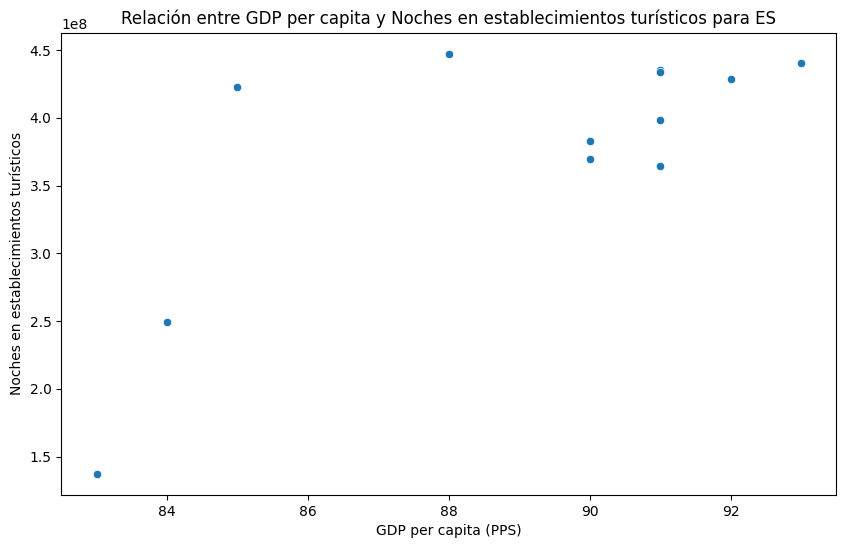

Correlación en ES: 0.7326287226163946


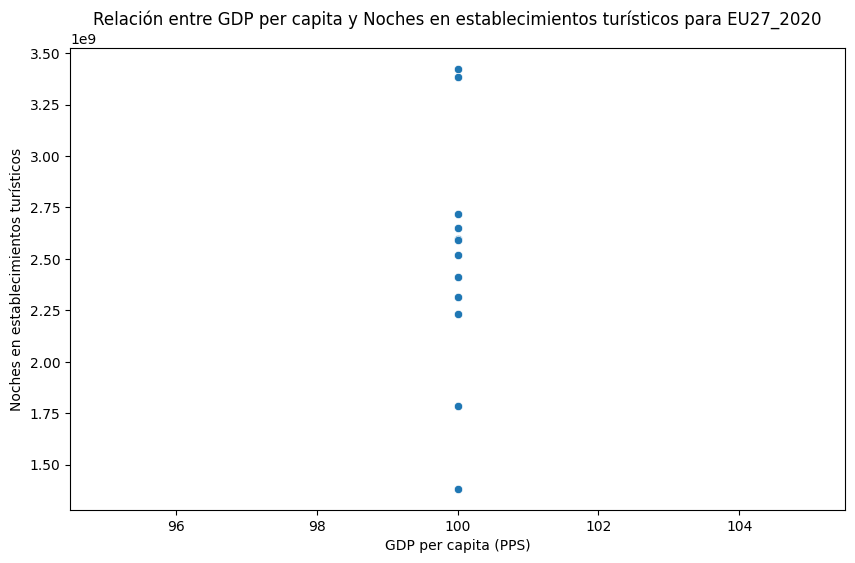

Correlación en EU27_2020: nan


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


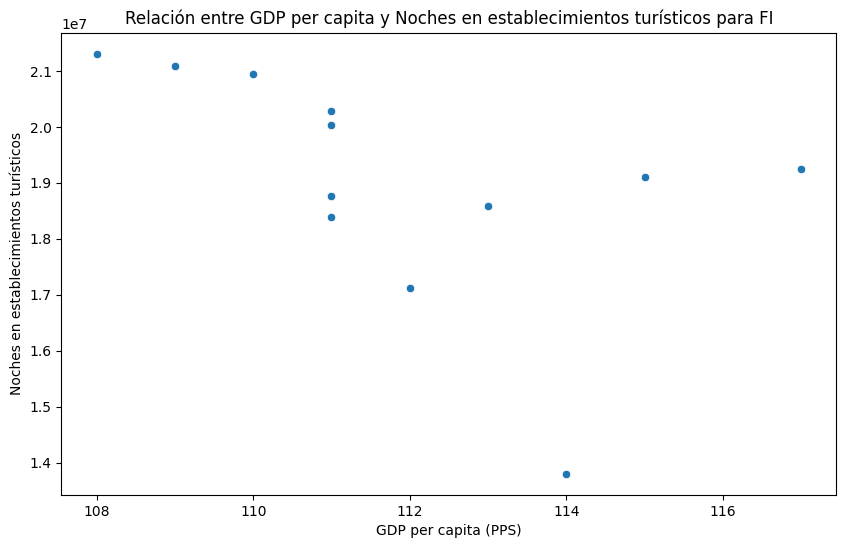

Correlación en FI: -0.5152742167614819


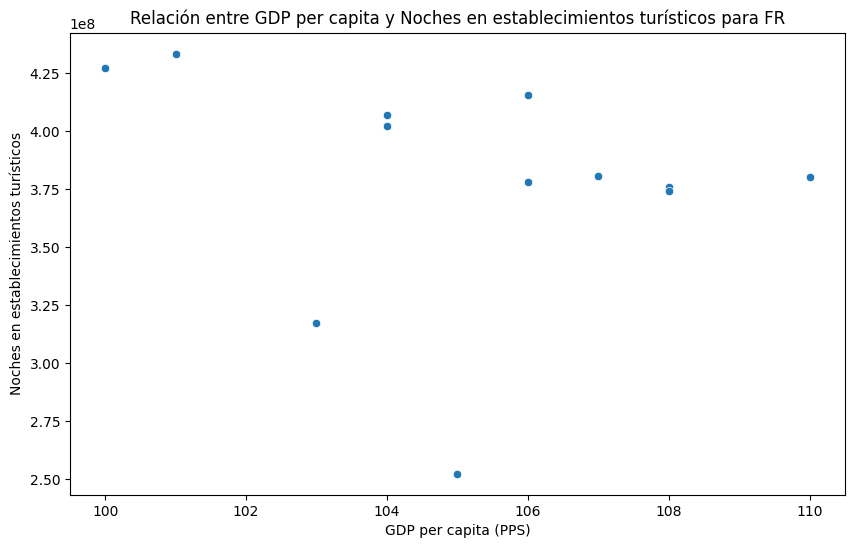

Correlación en FR: -0.22400418351248255


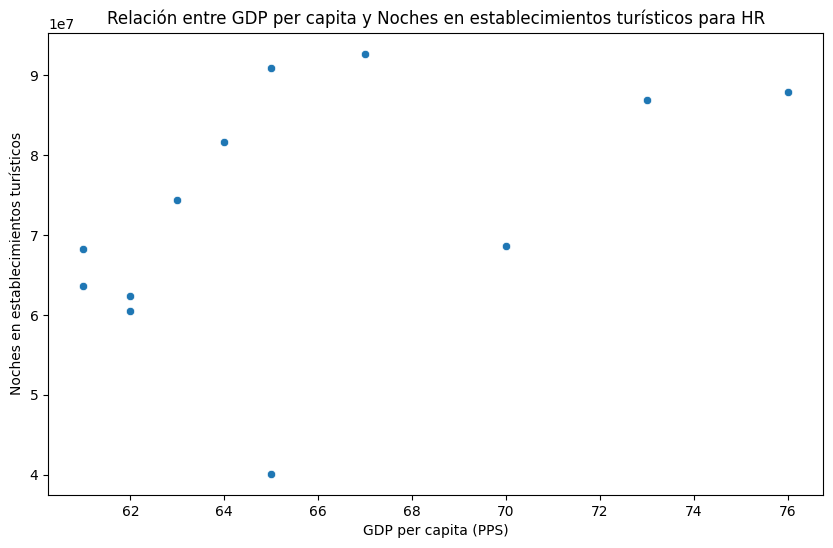

Correlación en HR: 0.4844069089428433


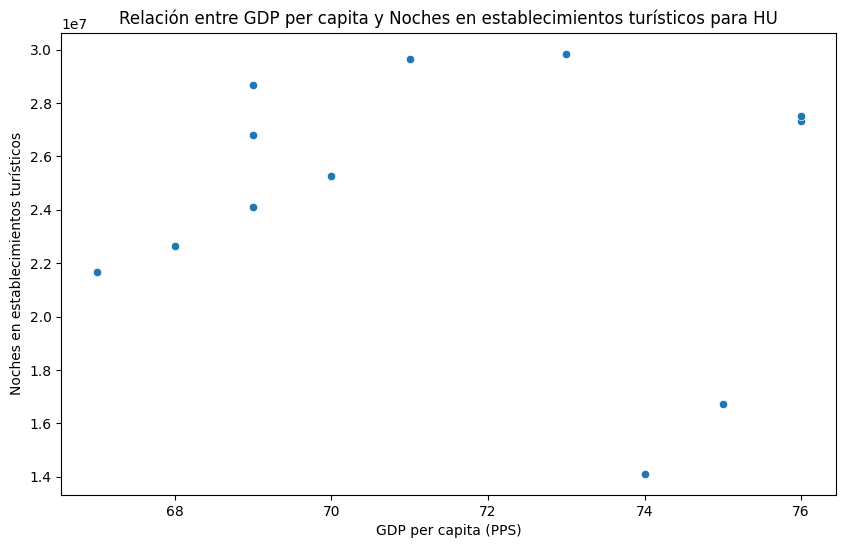

Correlación en HU: -0.1040879569284157


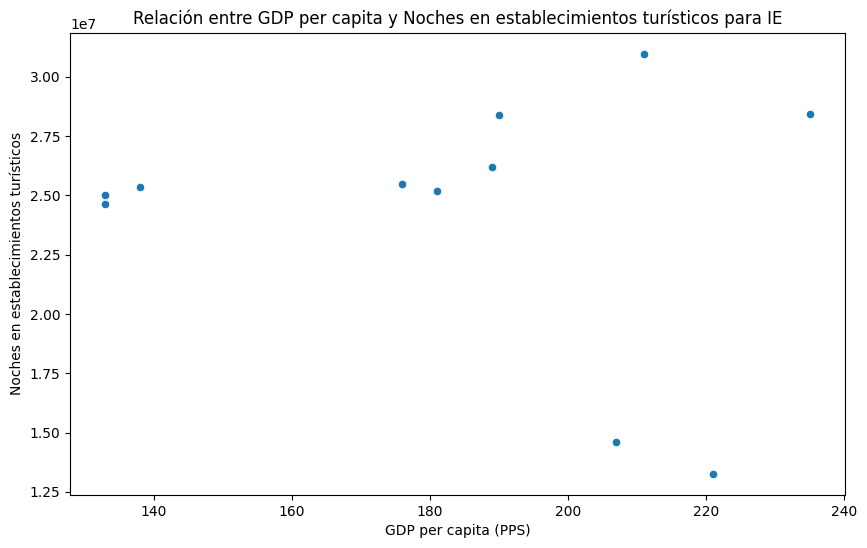

Correlación en IE: -0.1628130372617174


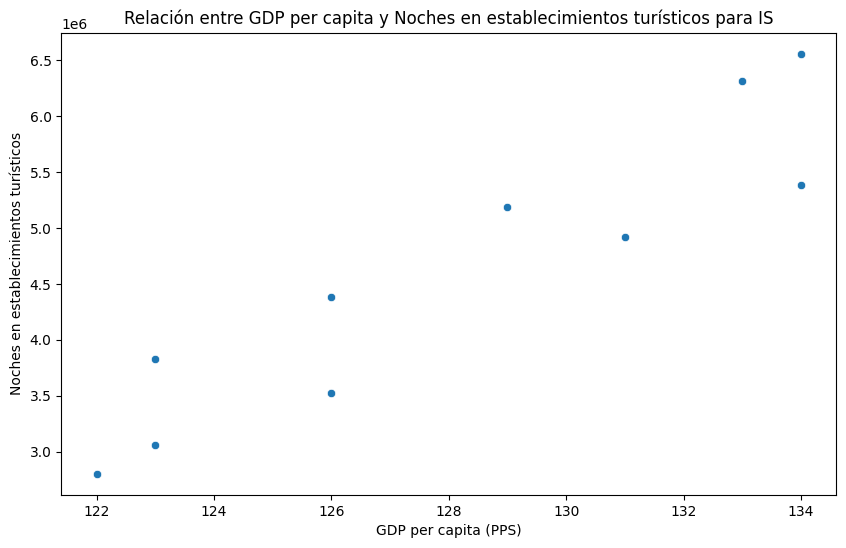

Correlación en IS: 0.9309885195240541


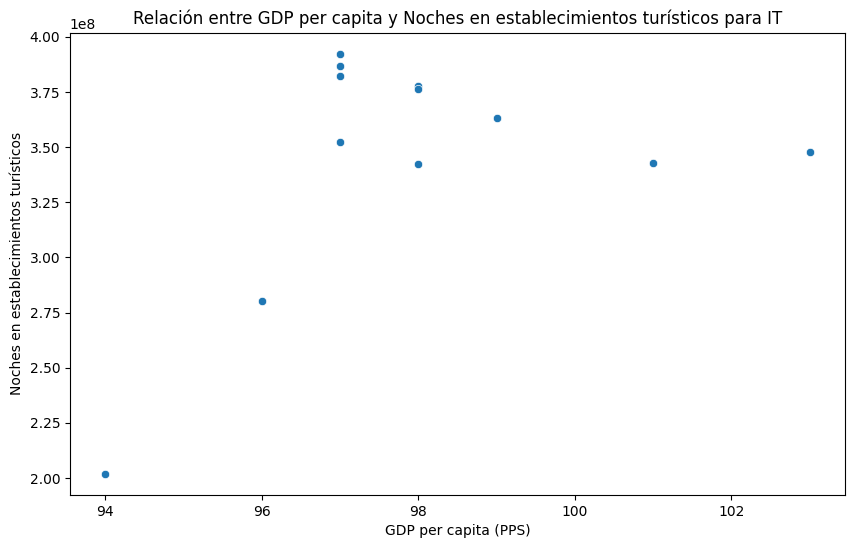

Correlación en IT: 0.42834361076488825


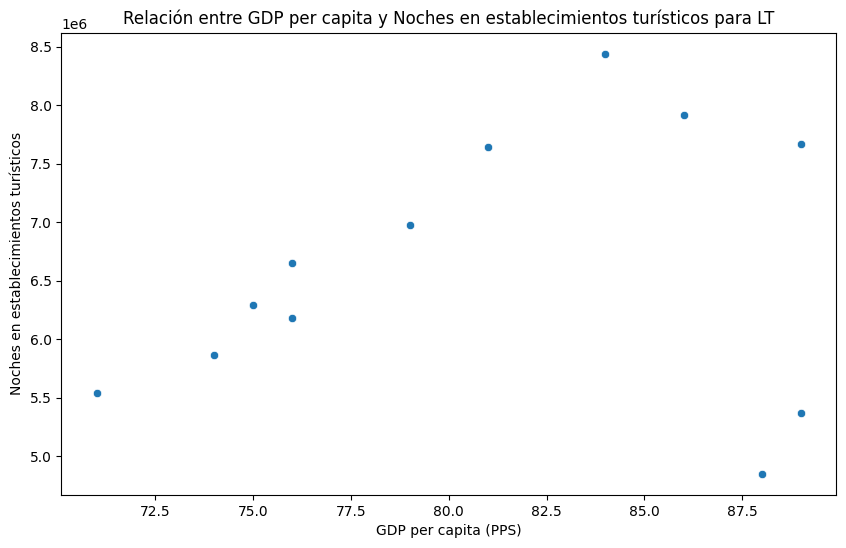

Correlación en LT: 0.2175662361956177


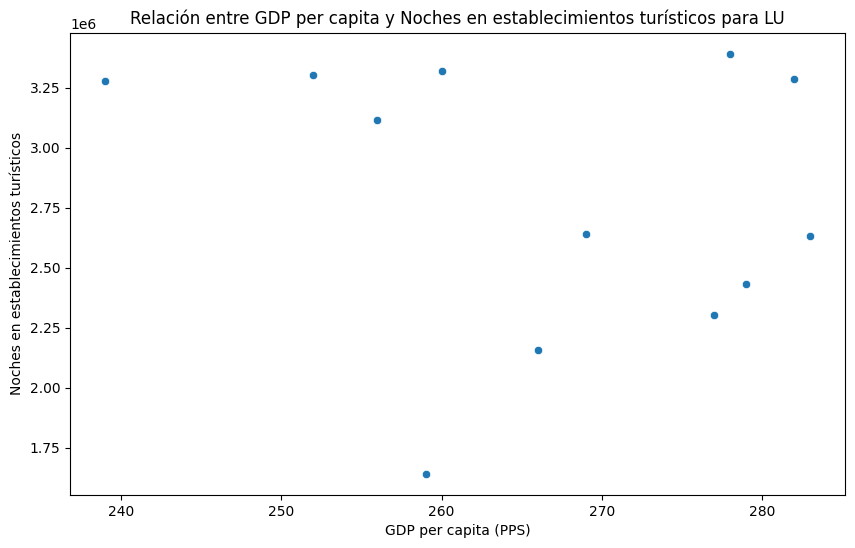

Correlación en LU: -0.1920115669226002


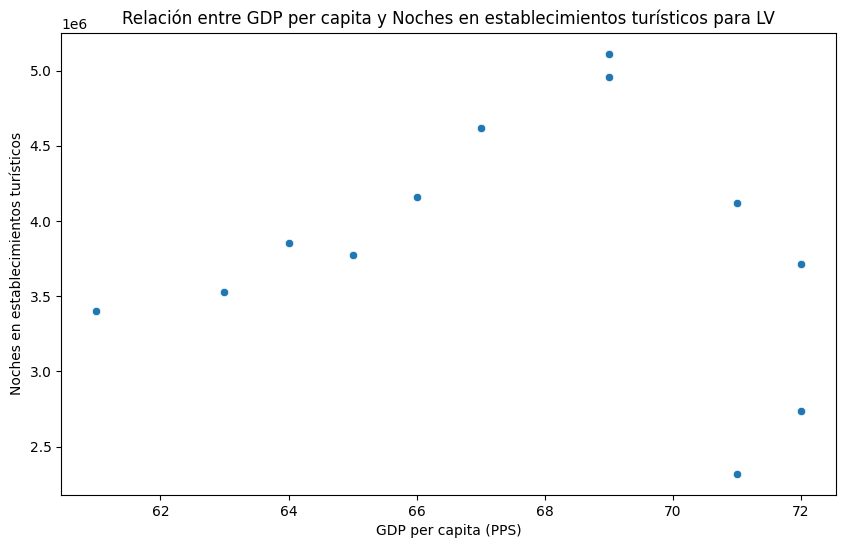

Correlación en LV: -0.08184322124321335


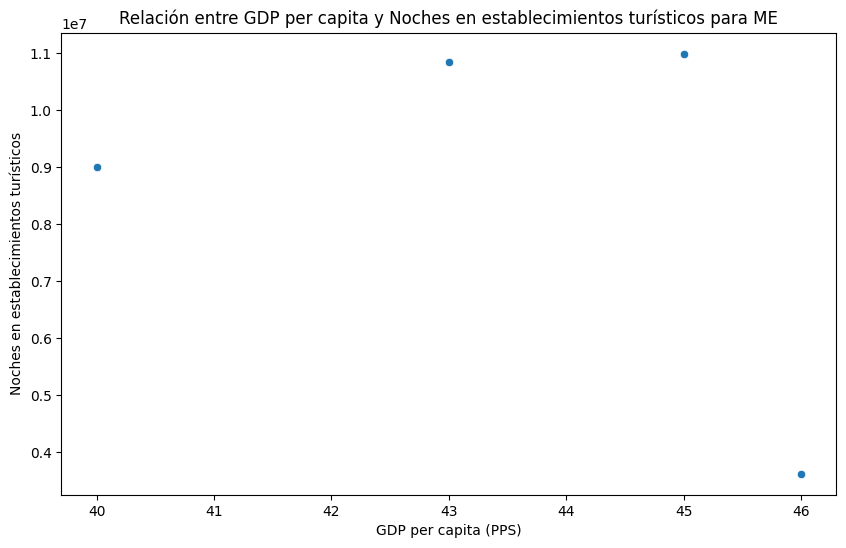

Correlación en ME: -0.41593853443185685


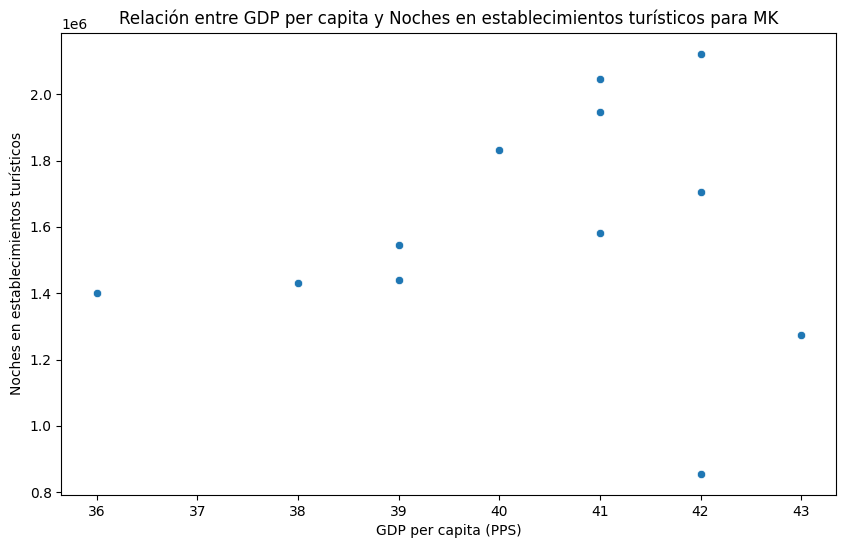

Correlación en MK: 0.11531741644624452


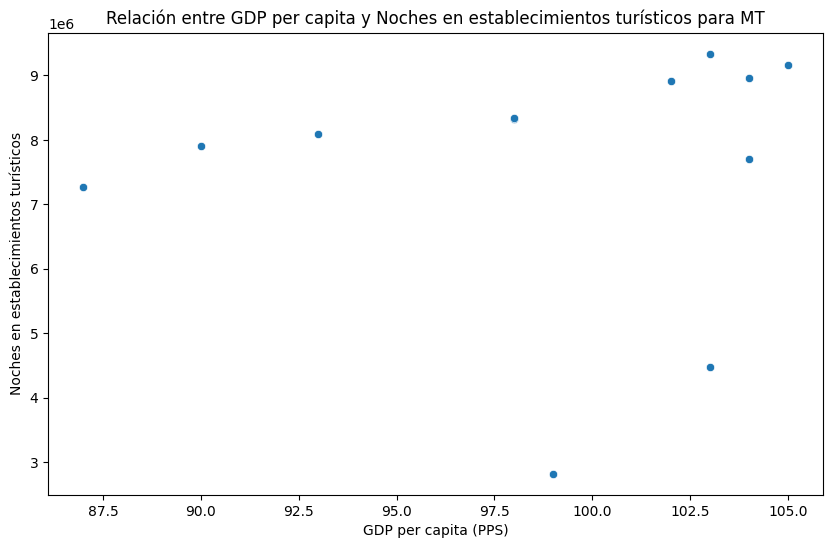

Correlación en MT: 0.09213365931771161


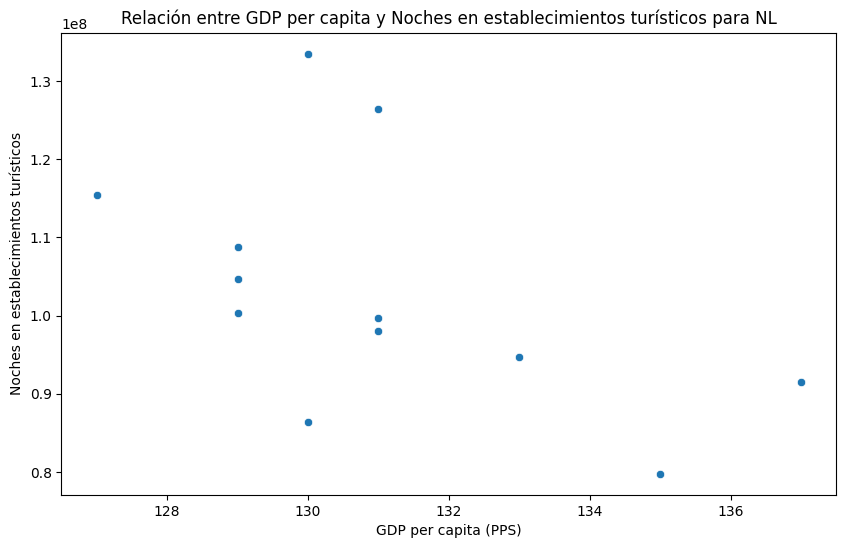

Correlación en NL: -0.5198880121980255


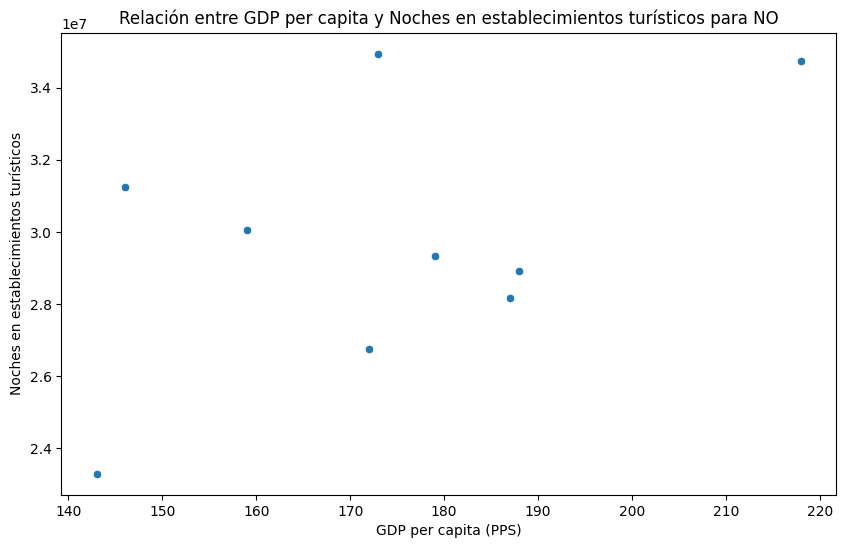

Correlación en NO: 0.49855448101859895


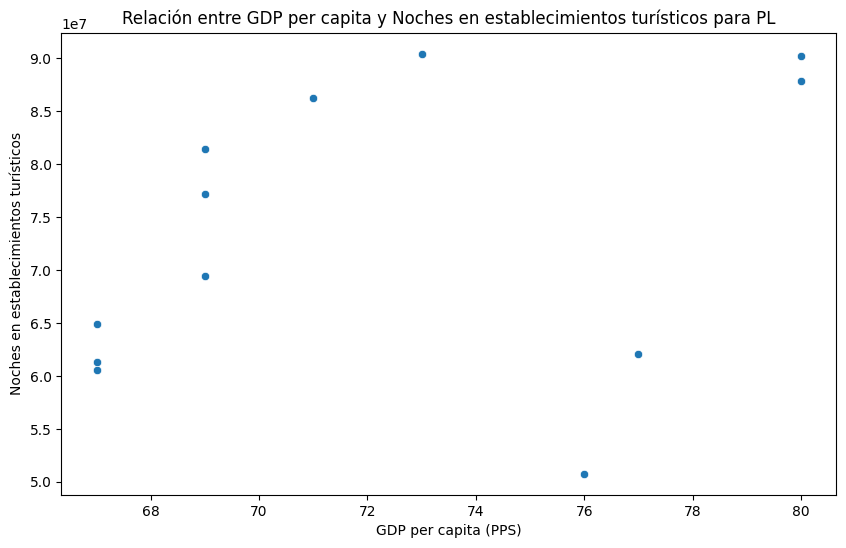

Correlación en PL: 0.3337575735071604


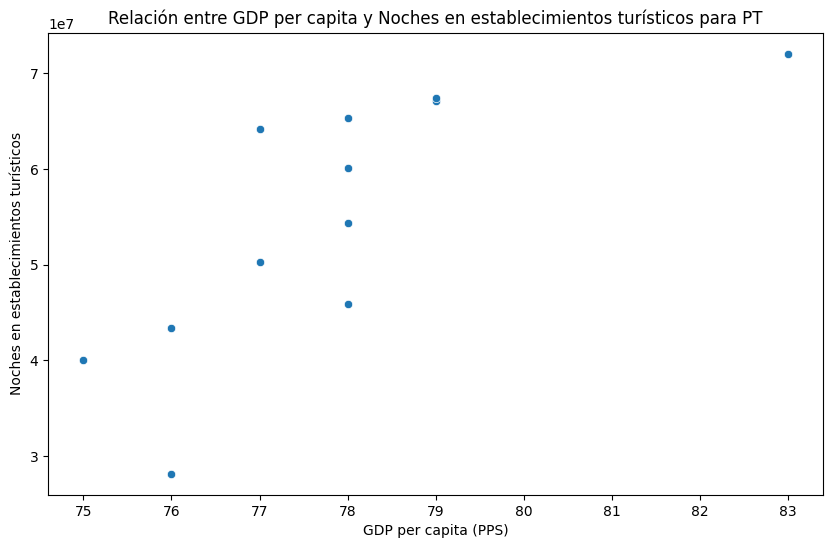

Correlación en PT: 0.7520435555916061


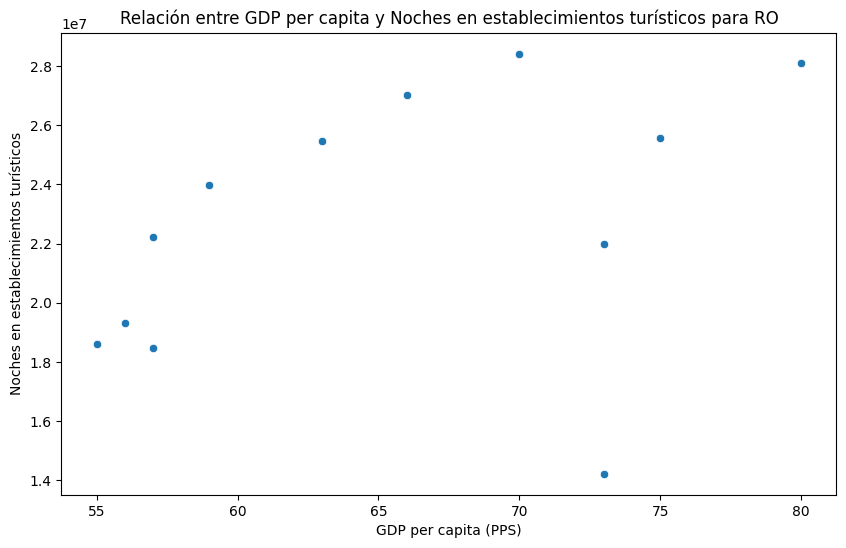

Correlación en RO: 0.3884017913497194


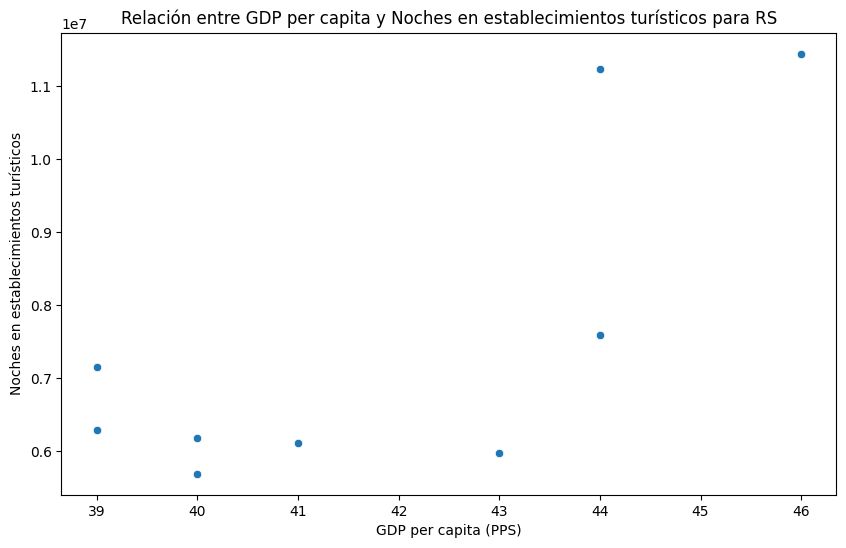

Correlación en RS: 0.7514333872296988


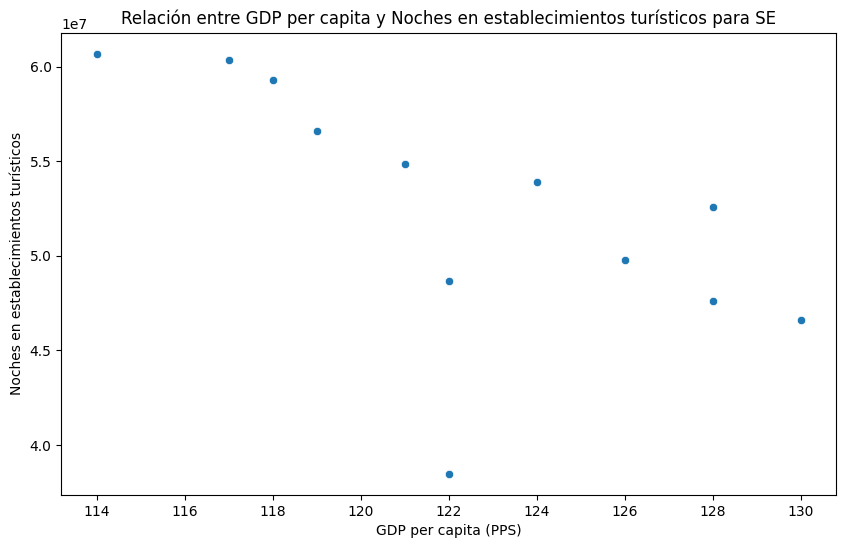

Correlación en SE: -0.6433353139252377


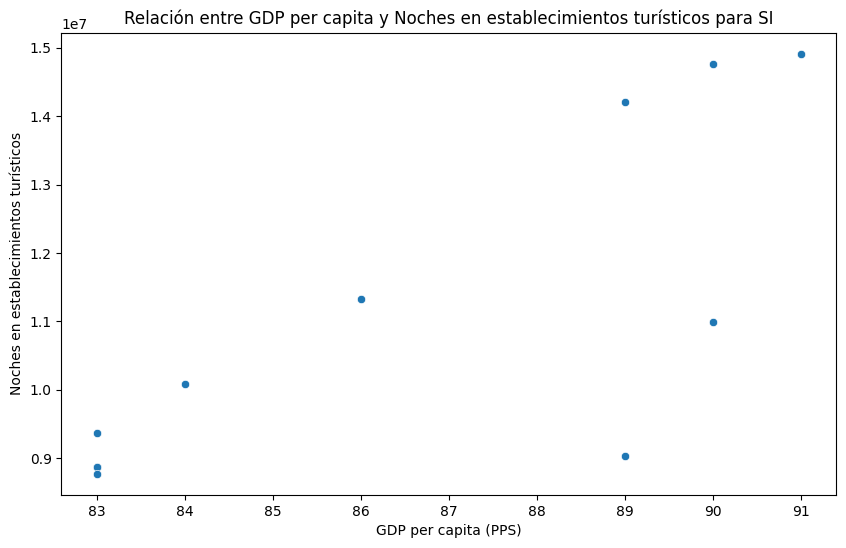

Correlación en SI: 0.7746836103558631


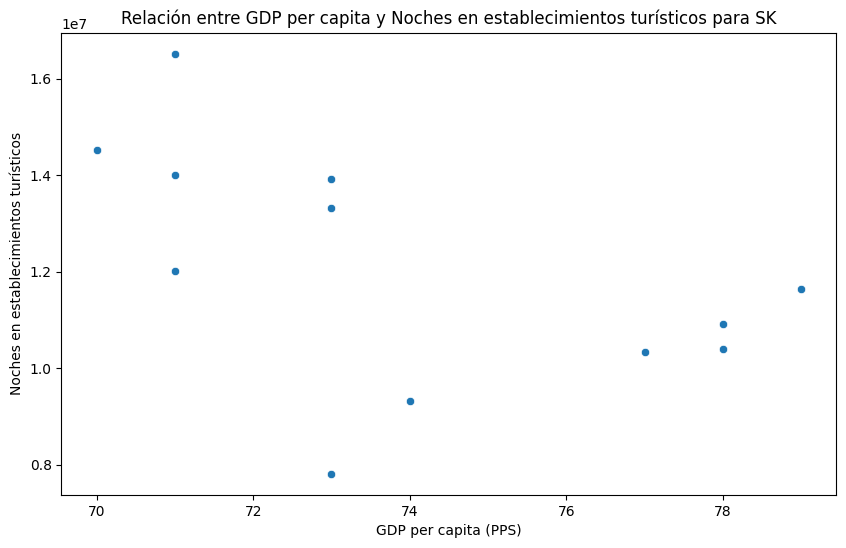

Correlación en SK: -0.5320276947633886


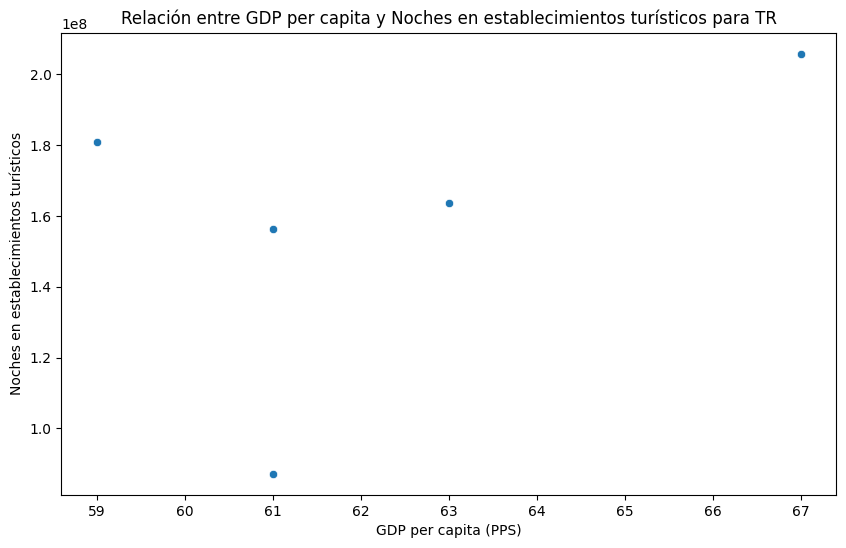

Correlación en TR: 0.460309460457894


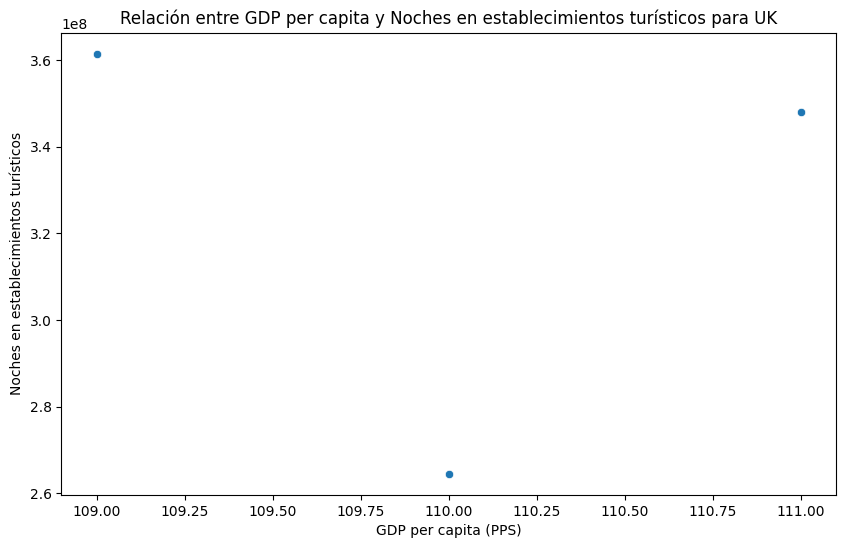

Correlación en UK: -0.12735138286199246


In [51]:
# Filtrar y calcular la correlación por país
for country in combined_df['geo'].unique():
    country_data = combined_df[combined_df['geo'] == country]
    
    # Graficar el dispersograma para cada país
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=country_data, x='GDP_per_capita', y='Tourist_nights')
    plt.title(f'Relación entre GDP per capita y Noches en establecimientos turísticos para {country}')
    plt.xlabel('GDP per capita (PPS)')
    plt.ylabel('Noches en establecimientos turísticos')
    plt.show()

    # Calcular la correlación para cada país
    country_corr = country_data['GDP_per_capita'].corr(country_data['Tourist_nights'])
    print(f'Correlación en {country}: {country_corr}')


5. Eliminar los años de COVID (2020 y 2021)

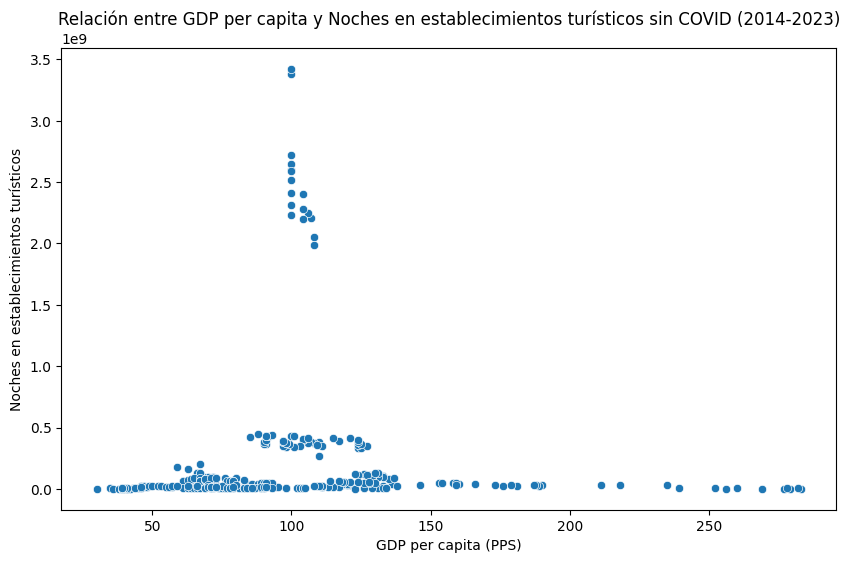

Correlación sin años COVID: 0.01767814291802259


In [52]:
# Filtrar fuera los años de COVID
filtered_df = combined_df[~combined_df['Year'].isin([2020, 2021])]

# Repetir el dispersograma y calcular correlación sin los años COVID
plt.figure(figsize=(10, 6))
sns.scatterplot(data=filtered_df, x='GDP_per_capita', y='Tourist_nights')
plt.title('Relación entre GDP per capita y Noches en establecimientos turísticos sin COVID (2014-2023)')
plt.xlabel('GDP per capita (PPS)')
plt.ylabel('Noches en establecimientos turísticos')
plt.show()

# Calcular la correlación sin los años COVID
filtered_correlation = filtered_df['GDP_per_capita'].corr(filtered_df['Tourist_nights'])
print(f'Correlación sin años COVID: {filtered_correlation}')